En este archivo utilizaremos el metodo de clustering de DBScan

In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Leemos el archivo
df=pd.read_csv('numeric_vgsales.csv')
del df['Unnamed: 0'] #borramos una columna que fue añadida erroneamente en los datos
del df['Exito']

df.head(201)

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,0.017102,0.007857,0.009168,0.002694,0.018233,0.000091
1,0.006014,0.016587,0.009168,0.009429,0.005998,0.000091
2,0.017449,0.007857,0.009163,0.002694,0.020152,0.000091
3,0.017447,0.003492,0.009191,0.010777,0.016554,0.000091
4,0.015393,0.013095,0.009173,0.014818,0.000720,0.000091
5,0.017445,0.003492,0.009191,0.006735,0.004078,0.000091
6,0.017443,0.013095,0.009205,0.009429,0.016554,0.000091
7,0.017440,0.016587,0.009168,0.006735,0.000720,0.000091
8,0.017438,0.010476,0.009150,0.012124,0.002279,0.000091
9,0.017436,0.007857,0.009159,0.012124,0.011396,0.000091


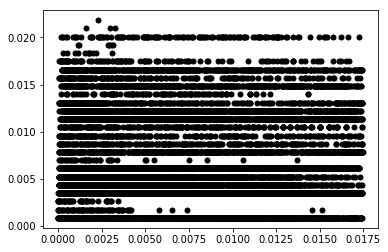

In [3]:
multishapes = df.values
plt.plot(multishapes[:, 0], multishapes[:, 1], 'o', 
         markeredgecolor='0', markerfacecolor='0', markersize=5)
plt.show()

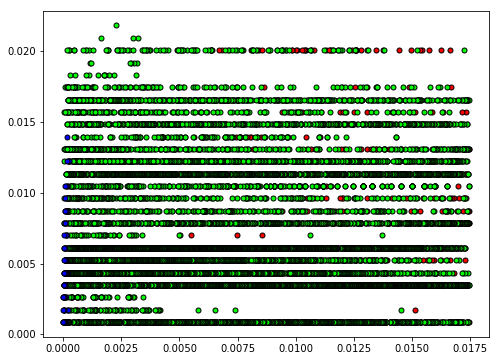

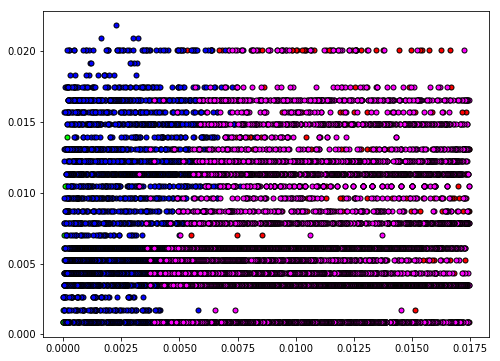

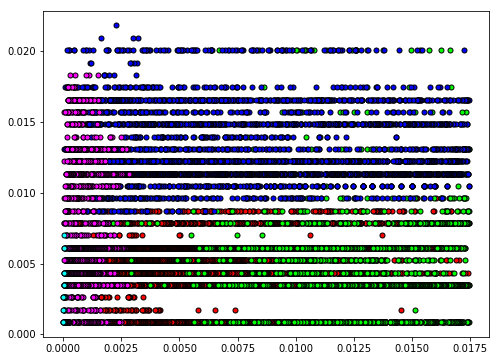

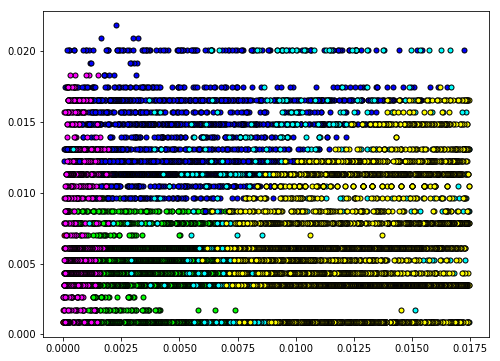

In [6]:
#Graficamos como queda la posibilidad con 3, 4, 5, 6, 7 clusters
for i in range(3,7):
    num_clusters = i
    k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
    k_means.fit(multishapes)

    fig = plt.figure(figsize=(8, 6))
    colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff', '#ffff00', '#f6ff00', 
              '#2f800f', '#a221b5', '#21b5ac', '#b1216c']
    for k in range(num_clusters):
        my_members = k_means.labels_ == k
        plt.plot(multishapes[my_members, 0], multishapes[my_members, 1], 'o', 
                 markeredgecolor='k', markerfacecolor=colors[k], markersize=5)

{0}


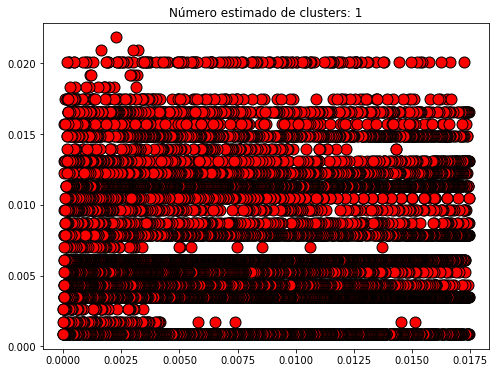

In [7]:
db = cluster.DBSCAN(eps=0.3, min_samples=10)
db.fit(multishapes)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(db.labels_)
print(unique_labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(unique_labels) - (1 if -1 in db.labels_ else 0)

fig = plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    my_members = db.labels_ == k

    xy = multishapes[my_members & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=11)

    xy = multishapes[my_members & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=6)
    
plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.show()